In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()

In [76]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [77]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [78]:
df_comp.head(), df_comp.tail()

(               spx      dax     ftse    nikkei
 date                                          
 1994-01-07  469.90  2224.95  3445.98  18124.01
 1994-01-10  475.27  2225.00  3440.58  18443.44
 1994-01-11  474.13  2228.10  3413.77  18485.25
 1994-01-12  474.17  2182.06  3372.02  18793.88
 1994-01-13  472.47  2142.37  3360.01  18577.26,
                     spx       dax         ftse    nikkei
 date                                                    
 2018-01-23  2839.130362  13559.60  7731.827774  24124.15
 2018-01-24  2837.544008  13414.74  7643.428966  23940.78
 2018-01-25  2839.253031  13298.36  7615.839954  23669.49
 2018-01-26  2872.867839  13340.17  7665.541292  23631.88
 2018-01-29  2853.528411  13324.48  7671.533300  23629.34)

In [79]:
df_comp['market_value']=df_comp.ftse
df_comp = df_comp.drop(columns=['spx', 'dax', 'ftse', 'nikkei'])
df_comp.head(), df_comp.tail()

(            market_value
 date                    
 1994-01-07       3445.98
 1994-01-10       3440.58
 1994-01-11       3413.77
 1994-01-12       3372.02
 1994-01-13       3360.01,             market_value
 date                    
 2018-01-23   7731.827774
 2018-01-24   7643.428966
 2018-01-25   7615.839954
 2018-01-26   7665.541292
 2018-01-29   7671.533300)

In [80]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

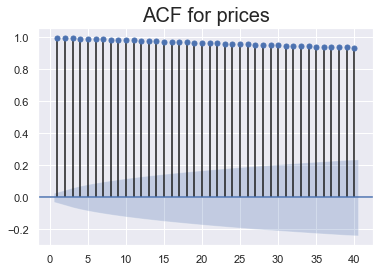

In [81]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF for prices", size=20);

In [82]:
import warnings
warnings.filterwarnings("ignore")

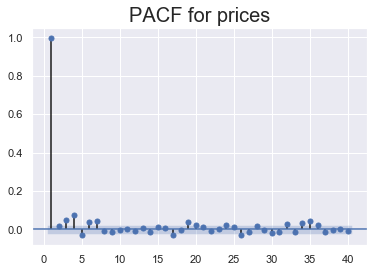

In [83]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.1, method='ols')
plt.title("PACF for prices", size=20);

First considered model:
$$
p(n+1) = c + \phi * p(n) + \xi
$$
where &phi; is parameter, &xi; is noise/residual/shock

In [91]:
model_ar1=ARMA(df.market_value, order=(1,0)) # p(n+1) = c + phi * p(n) + ks
results_ar1=model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.599
Method:                       css-mle   S.D. of innovations             59.258
Date:                Thu, 30 Apr 2020   AIC                          55251.198
Time:                        18:18:21   BIC                          55270.762
Sample:                    01-07-1994   HQIC                         55258.054
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5067.4707    486.503     10.416      0.000    4113.942    6021.000
ar.L1.market_value     0.9985      0.001   1298.545      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

Second considered model:
$$
p(n+2) = c + \phi_1 * p(n+1) + \phi_0 * p(n) + \xi
$$
where &phi; is parameter, &xi; is noise/residual/shock

In [85]:
model_ar2=ARMA(df.market_value, order=(2,0)) 
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Thu, 30 Apr 2020   AIC                          55251.742
Time:                        18:18:08   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    495.670     10.268      0.000    4118.145    6061.137
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4629           +0.0000j           58.4629            0.5000
-----------------------------------------------------------------------------
"""

In [86]:
model_ar3=ARMA(df.market_value, order=(3,0)) 
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.871
Method:                       css-mle   S.D. of innovations             59.178
Date:                Thu, 30 Apr 2020   AIC                          55241.742
Time:                        18:18:09   BIC                          55274.349
Sample:                    01-07-1994   HQIC                         55253.168
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    520.356      9.781      0.000    4069.761    6109.521
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1850           -4.5161j            4.5199           -0.2565
AR.3           -0.1850           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [87]:
model_ar4=ARMA(df.market_value, order=(4,0)) 
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Thu, 30 Apr 2020   AIC                          55217.130
Time:                        18:18:09   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    560.015      9.088      0.000    3992.032    6187.250
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

### Log likelyhood ratio (LLR)

In [88]:
L1 = results_ar1.llf
L2 = results_ar2.llf
LR = 2 * (L2-L1)
p = chi2.sf(LR,1).round(3)
print(p)

0.228


In [89]:
LLRs = [result.llf for result in [results_ar1,results_ar2,results_ar3,results_ar4,]]



In [92]:
def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR = 2 * (L2-L1)
    return chi2.sf(LR,DF).round(3)    

LLR_test(model_ar1, model_ar2)

0.228

In [96]:
def LLR_test2(L1, L2, DF=1):
    LR = 2 * (L2-L1)
    return chi2.sf(LR,DF).round(3)   

LLRs = [result.llf for result in [results_ar1,results_ar2,results_ar3,results_ar4,]]
ps = [LLR_test2(LLRs[i-1], LLRs[i]) for i in range(1,len(LLRs))]
print(ps)

[0.228, 0.001, 0.0]


In [100]:
model_ar5=ARMA(df.market_value, order=(5,0))
results_ar5=model_ar5.fit()
results_ar5.summary(), LLR_test(model_ar4, model_ar5)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               ARMA Model Results                              
 Dep. Variable:           market_value   No. Observations:                 5021
 Model:                     ARMA(5, 0)   Log Likelihood              -27600.343
 Method:                       css-mle   S.D. of innovations             58.995
 Date:                Thu, 30 Apr 2020   AIC                          55214.685
 Time:                        18:24:19   BIC                          55260.335
 Sample:                    01-07-1994   HQIC                         55230.681
                          - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------
 const               5031.9353    542.873      9.269      0.000    3967.923    6095.947
 ar.L1.market_value     0.9791      0.014     

In [101]:
model_ar6=ARMA(df.market_value, order=(6,0))
results_ar6=model_ar6.fit()
results_ar6.summary(), LLR_test(model_ar5, model_ar6)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               ARMA Model Results                              
 Dep. Variable:           market_value   No. Observations:                 5021
 Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
 Method:                       css-mle   S.D. of innovations             58.950
 Date:                Thu, 30 Apr 2020   AIC                          55208.947
 Time:                        18:24:42   BIC                          55261.118
 Sample:                    01-07-1994   HQIC                         55227.229
                          - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------
 const               5089.6411    565.304      9.003      0.000    3981.665    6197.617
 ar.L1.market_value     0.9803      0.014     

In [102]:
model_ar7=ARMA(df.market_value, order=(7,0))
results_ar7=model_ar7.fit()
results_ar7.summary(), LLR_test(model_ar6, model_ar7)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               ARMA Model Results                              
 Dep. Variable:           market_value   No. Observations:                 5021
 Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
 Method:                       css-mle   S.D. of innovations             58.896
 Date:                Thu, 30 Apr 2020   AIC                          55201.799
 Time:                        18:25:31   BIC                          55260.492
 Sample:                    01-07-1994   HQIC                         55222.366
                          - 04-05-2013                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------
 const               5089.6412    589.590      8.633      0.000    3934.066    6245.216
 ar.L1.market_value     0.9786      0.014     

In [104]:
model_ar8=ARMA(df.market_value, order=(8,0))
results_ar8=model_ar8.fit()
print(LLR_test(model_ar7, model_ar8))
results_ar8.summary()

0.571


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Thu, 30 Apr 2020   AIC                          55203.478
Time:                        18:27:54   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    584.988      8.700      0.000    3943.086    6236.197
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value    -0.0304      0.020     -1.541      0.123      -0.069       0.008
ar.L3.market_value    -0.0272      0.020     -1.379      0.168      -0.066       0.011
ar.L4.market_value     0.1047      0.020      5.306      0.000       0.066       0.143
ar.L5.market_value    -0.0670      0.020     -3.395      0.001      -0.106      -0.028
ar.L6.market_value    -0.0028      0.020     -0.140      0.889      -0.041       0.036
ar.L7.market_value     0.0505      0.020      2.559      0.010       0.012       0.089
ar.L8.market_value    -0.0080      0.014     -0.567      0.571      -0.036       0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.6223           -0.6323j            1.7412           -0.4409
AR.3           -1.6223           +0.6323j            1.7412            0.4409
AR.4           -0.0911           -1.5626j            1.5653           -0.2593
AR.5           -0.0911           +1.5626j            1.5653            0.2593
AR.6            1.3256           -1.0019j            1.6616           -0.1030
AR.7            1.3256           +1.0019j            1.6616            0.1030
AR.8            6.0862           -0.0000j            6.0862           -0.0000
-----------------------------------------------------------------------------
"""

7$^{th}$ order model is best because 8th has ar.L8.market_value z negative, which means it's insignificant

In [110]:
df['res_price']=results_ar7.resid
df.res_price.mean(), df.res_price.var()

(0.35224692327344465, 4005.9446690156165)

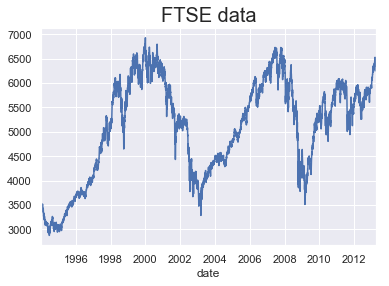

In [118]:
df.market_value.plot()
plt.title("FTSE data", size=20);

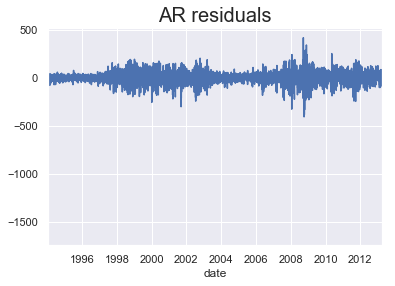

In [119]:
df.res_price.plot()
plt.title("AR residuals", size=20);

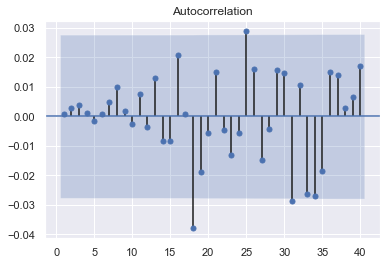

In [120]:
sgt.plot_acf(df.res_price, zero=False, lags=40);

In [122]:
sts.adfuller(df.market_value) # Augmented Dickey-Fuller test

(-1.904155141883686,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

In [123]:
sts.adfuller(df.res_price) # Augmented Dickey-Fuller test

(-76.07468560212466,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.41512454752)

In [127]:

from scipy.io.wavfile import write

scaled = np.int16(df.res_price/np.max(np.abs(df.res_price)) * 32767)
write('test.wav', 441, scaled)